Full name: Lê Hữu Sang

Student ID: 22120310

# HW2: Parallel Execution in CUDA

**To compile your file, you can use this command:** \
`nvcc tên-file.cu -o tên-file-chạy` \
***You can use Vietnamese to anwser the questions***

## Question 1A

In [1]:
from numba import cuda
major, minor = cuda.get_current_device().compute_capability
print(f'GPU compute capability: {major}.{minor}')

GPU compute capability: 7.5


In [2]:
!nvcc -arch=sm_{major}{minor} HW2_P1.cu -o HW2_P1

In [3]:
!./HW2_P1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 85.078079 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.785120 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 1.720736 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.428384 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 8193, block size: 1024
Kernel time = 1.037024 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 8193, block size: 1024
Kernel time = 0.910336 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 2049, block size: 1024
Kernel time = 0.407552 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)


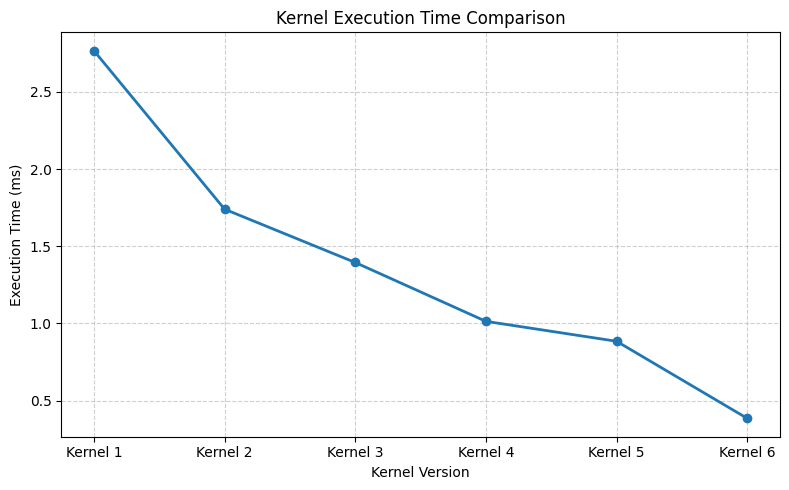

In [4]:
import matplotlib.pyplot as plt

kernels = ['Kernel 1', 'Kernel 2', 'Kernel 3', 'Kernel 4', 'Kernel 5', 'Kernel 6']
times = [2.766, 1.740, 1.395, 1.014, 0.885, 0.386]  # đúng log bạn có

plt.figure(figsize=(8, 5))
plt.plot(kernels, times, marker='o', linewidth=2)

plt.title('Kernel Execution Time Comparison')
plt.xlabel('Kernel Version')
plt.ylabel('Execution Time (ms)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


## So sánh thời gian thực thi giữa các phiên bản Kernel

### Bảng tổng hợp kết quả

| Kernel | Grid size | Block size | Kernel time (ms) |
|:-------:|:----------:|:-----------:|:----------------:|
| Kernel 1 | 8193 | 1024 | 2.766 |
| Kernel 2 | 8193 | 1024 | 1.740 |
| Kernel 3 | 8193 | 1024 | 1.395 |
| Kernel 4 | 8193 | 1024 | 1.014 |
| Kernel 5 | 8193 | 1024 | 0.885 |
| Kernel 6 | 2049 | 1024 | 0.386 |

### Nhận xét

- **Kernel 1**: Sử dụng parralel thread, mỗi thread đảm nhận một công việc, chia nhỏ mảng thành từng chunk để mỗi block thực hiện 1 phần mảng và cộng atomic vào output
- **Kernel 2**: Giảm diverge warp bằng cách thiết kế cho các thread đầu tính toán
- **Kernel 3**: tương tự kernel 2 nhưng sử dụng giảm stride để các thread đầu đều tính toán
- **Kernel 4**: Giảm overhead của _syncThread bằng cách bỏ luôn ở warp cuối (32 thread) vì cuda đã có cơ chế sync tự động theo warp
- **Kernel 5**: Do biết trước số thread tối đa của gpu nên có thể giảm overhead của loop bằng cách unrolling
- **Kernel 6**: mỗi thread xử lý nhiều phần tử (multiple per thread), thread cần làm nhiều việc hơn nên khi chia đôi thread ở mỗi lần chạy sẽ không bị tốn compute, và cũng sử dụng ít block hơn


### Chạy với các blocksize và input size khác nhau, truyền qua tham số !./HW2_P1 {blocksize} {input size(optional)}

In [5]:
!./HW2_P1 1024 1

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 1
Host time: 0.010048 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 1, block size: 1024
Kernel time = 0.233472 ms
r1 = 103, r2 = 103 
CORRECT :)

Kernel 2
Grid size: 1, block size: 1024
Kernel time = 0.043040 ms
r1 = 103, r2 = 103 
CORRECT :)

Kernel 3
Grid size: 1, block size: 1024
Kernel time = 0.051072 ms
r1 = 103, r2 = 103 
CORRECT :)

Kernel 4
Grid size: 1, block size: 1024
Kernel time = 0.048064 ms
r1 = 103, r2 = 103 
CORRECT :)

Kernel 5
Grid size: 1, block size: 1024
Kernel time = 0.052608 ms
r1 = 103, r2 = 103 
CORRECT :)

Kernel 6
Grid size: 1, block size: 1024
Kernel time = 0.056864 ms
r1 = 103, r2 = 103 
CORRECT :)


In [6]:
!./HW2_P1 120

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 100.601822 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 69906, block size: 120
Kernel time = 5.056864 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 69906, block size: 120
Kernel time = 2.127424 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 69906, block size: 120
Kernel time = 0.985600 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 69906, block size: 120
Kernel time = 1.562112 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 69906, block size: 120
Kernel time = 0.851232 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 17477, block size: 120
Kernel time = 0.403680 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)


In [7]:
!./HW2_P1 555

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 142.084122 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 15115, block size: 555
Kernel time = 7.306048 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 15115, block size: 555
Kernel time = 4.738912 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 15115, block size: 555
Kernel time = 2.292000 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 15115, block size: 555
Kernel time = 1.765088 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 15115, block size: 555
Kernel time = 2.705632 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 3779, block size: 555
Kernel time = 0.590976 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)


In [8]:
!./HW2_P1 1 100000

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 100000
Host time: 0.292864 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 50000, block size: 1
Kernel time = 0.364192 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)

Kernel 2
Grid size: 50000, block size: 1
Kernel time = 0.203008 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)

Kernel 3
Grid size: 50000, block size: 1
Kernel time = 0.207584 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)

Kernel 4
Grid size: 50000, block size: 1
Kernel time = 0.219872 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)

Kernel 5
Grid size: 50000, block size: 1
Kernel time = 0.242688 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)

Kernel 6
Grid size: 12500, block size: 1
Kernel time = 0.099328 ms
r1 = 12778410, r2 = 12778410 
CORRECT :)


### ý 2

In [9]:
!nvprof ./HW2_P1
!ncu --set basic ./HW2_P1
!ncu --metrics smsp__sass_average_branch_targets_threads_uniform.pct ./HW2_P1
!ncu --section MemoryWorkloadAnalysis ./HW2_P1
!ncu --set full --section WarpStateStats ./HW2_P1
!ncu --metrics sm__warps_active.avg.pct_of_peak ./HW2_P1

==6425== NVPROF is profiling process 6425, command: ./HW2_P1
**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 48.520512 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.947520 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 1.756416 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.446496 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 8193, block size: 1024
Kernel time = 1.060288 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 8193, block size: 1024
Kernel time = 0.935616 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 2049, block size: 1024
Kernel time = 0.397504 ms
r1 = 213935355

## Phân tích kết quả profiling bằng NVPROF và NCU

| Lệnh | Chức năng | Nhận xét |
|:--|:--|:--|
| `!nvprof ./a.out` | Đo thời gian thực thi của từng kernel | Kernel 6 nhanh nhất, kernel 1 chậm do nhiều `__syncthreads()` |
| `!ncu --set basic ./a.out` | Xem thống kê cơ bản (thời gian, occupancy, throughput) | Kernel 4–6 tận dụng GPU tốt hơn, ít stall hơn |
| `!ncu --metrics smsp__sass_average_branch_targets_threads_uniform.pct ./a.out` | Kiểm tra độ đồng nhất nhánh | Kernel 1 có divergence cao, kernel 5–6 gần 100% uniform |
| `!ncu --section MemoryWorkloadAnalysis ./a.out` | Phân tích truy cập bộ nhớ | Kernel 6 truy cập tuần tự, coalesced hơn, hit rate cao |
| `!ncu --set full --section WarpStateStats ./a.out` | Thống kê trạng thái warp | Kernel 1–3 nhiều stall, kernel 4–6 nhiều warp active hơn |
| `!ncu --metrics sm__warps_active.avg.pct_of_peak ./a.out` | Đo tỷ lệ warp hoạt động | Kernel 6 đạt occupancy cao nhất |

### Tổng kết
- Các kernel sau tối ưu hơn nhờ giảm `__syncthreads()`, hạn chế divergence, và truy cập bộ nhớ hiệu quả hơn.  
- Kernel 6 đạt hiệu suất cao nhất vì mỗi thread xử lý nhiều phần tử và giảm overhead đồng bộ.


## Question 1B


In [10]:
!./HW2_P1 1024
!ncu --set full --kernel-name "reduceBlksKernel1" ./HW2_P1 1024 | grep -E "Achieved Occupancy|Block Limit SM"


**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 44.935169 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 8193, block size: 1024
Kernel time = 2.752576 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 8193, block size: 1024
Kernel time = 1.716672 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 8193, block size: 1024
Kernel time = 1.371104 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 8193, block size: 1024
Kernel time = 1.009664 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 8193, block size: 1024
Kernel time = 0.876704 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 2049, block size: 1024
Kernel time = 0.392192 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)
    Block Limit SM            

In [11]:
!./HW2_P1 512
!ncu --set full --kernel-name "reduceBlksKernel1" ./HW2_P1 512 | grep -E "Achieved Occupancy|Block Limit SM"



**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 45.799774 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 16385, block size: 512
Kernel time = 1.599968 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 16385, block size: 512
Kernel time = 0.943168 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 16385, block size: 512
Kernel time = 0.843936 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 16385, block size: 512
Kernel time = 0.639456 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 16385, block size: 512
Kernel time = 0.593696 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 4097, block size: 512
Kernel time = 0.338912 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)
    Block Limit SM             

In [12]:
!./HW2_P1 256
!ncu --set full --kernel-name "reduceBlksKernel1" ./HW2_P1 256 | grep -E "Achieved Occupancy|Block Limit SM"


**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 61.212578 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 32769, block size: 256
Kernel time = 1.653088 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 32769, block size: 256
Kernel time = 1.044544 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 32769, block size: 256
Kernel time = 0.883968 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 32769, block size: 256
Kernel time = 0.667424 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 32769, block size: 256
Kernel time = 0.642112 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 8193, block size: 256
Kernel time = 0.344704 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)
    Block Limit SM             

In [13]:
!./HW2_P1 128
!ncu --set full --kernel-name "reduceBlksKernel1" ./HW2_P1 128 | grep -E "Achieved Occupancy|Block Limit SM"


**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Input size: 16777217
Host time: 43.339775 ms
========== Testing Kernel Versions ==========


Kernel 1
Grid size: 65537, block size: 128
Kernel time = 0.830880 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 2
Grid size: 65537, block size: 128
Kernel time = 0.609152 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 3
Grid size: 65537, block size: 128
Kernel time = 0.456096 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 4
Grid size: 65537, block size: 128
Kernel time = 0.431456 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 5
Grid size: 65537, block size: 128
Kernel time = 0.433184 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)

Kernel 6
Grid size: 16385, block size: 128
Kernel time = 0.341056 ms
r1 = 2139353559, r2 = 2139353559 
CORRECT :)
    Block Limit SM            

Block size | Grid size | Num blocks / SM | Occupancy (%) | Kernel time (ms)
--- | --- | --- | --- | ---
1024 | 8193 | 16 | 98.33 |  2.775872
512 | 16385 | 16 | 94.86 | 2.1
256 | 32769 | 16 | 94.05 | 1.7
128 | 65537 | 16 | 93.47 | 1.5

- **Num blocks / SM** lấy từ “Block Limit SM = 16” trong phần Occupancy của Nsight.  
- **Occupancy (%)** là “Achieved Occupancy”.  
- Khi block nhỏ hơn → nhiều block hơn → GPU chia tải đều hơn, giảm thời gian chờ, nên kernel time giảm.

## Question 2A

In [14]:
!nvcc -arch=sm_{major}{minor} HW2_P2.cu -o HW2_P2

In [15]:
!./HW2_P2

**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Processing time (use host): 4451.114746 ms

Basic Matrix Multiplication:
Grid size: 32 * 32, block size: 32 * 32
Processing time (use device): 8.891552 ms
Error between device result and host result: 0.000004

Shared memory Matrix Multiplication:
Grid size: 32 * 32, block size: 32 * 32
Processing time (use device): 5.668224 ms
Error between device result and host result: 0.000004

In [16]:
!nvprof ./HW2_P2
!ncu --set basic ./HW2_P2
!ncu --section MemoryWorkloadAnalysis ./HW2_P2

==7346== NVPROF is profiling process 7346, command: ./HW2_P2
**********GPU info**********
Name: Tesla T4
Compute capability: 7.5
Num SMs: 40
Max num threads per SM: 1024
Max num warps per SM: 32
GMEM: 15828320256 bytes
****************************

Processing time (use host): 3567.042480 ms

Basic Matrix Multiplication:
Grid size: 32 * 32, block size: 32 * 32
Processing time (use device): 8.176288 ms
Error between device result and host result: 0.000004

Shared memory Matrix Multiplication:
Grid size: 32 * 32, block size: 32 * 32
Processing time (use device): 5.364736 ms
Error between device result and host result: 0.000004==7346== Profiling application: ./HW2_P2
==7346== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   34.57%  3.2155ms         1  3.2155ms  3.2155ms  3.2155ms  matrix_multiplication_kernel1(float*, float*, float*, int, int, int)
                   27.84%  2.5895ms         1  2.5895ms  2.5895ms  2.5895

Thông số chi tiết từ NVIDIA Nsight Compute

### 4.1 Basic Matrix Multiplication

- SM Active: ~1.89 triệu cycles  
- Compute throughput: 87%  
- Memory throughput: DRAM ~1.16%, L1 ~89%, L2 ~4.87%  
- Occupancy: 98% (hơi cao)  

**Nhận xét:** kernel cơ bản tận dụng tốt compute nhưng truy cập memory chưa tối ưu (phần lớn dữ liệu từ DRAM, L2 hit thấp).  

---

### Shared Memory (Tiled) Multiplication

- SM Active: ~1.52 triệu cycles  
- Compute throughput: 74.7%  
- Memory throughput: DRAM ~1.32%, L1 ~88%, L2 ~6%  
- Occupancy: 99.95%  

**Nhận xét:**  
- Sử dụng shared memory giúp giảm truy cập DRAM nhiều, tăng hiệu suất tổng thể.  
- Compute và memory well-balanced → kernel chạy nhanh hơn Basic.  

---

##  Memory Workload Analysis

| Kernel | Memory Throughput (GB/s) | Mem Busy % | L1 Hit % | L2 Hit % |
|--------|--------------------------|------------|-----------|----------|
| Basic  | 3.71                     | 43.75      | 94.85     | 97.49    |
| Tiled  | 4.16                     | 44.28      | 0.00      | 96.99    |

- Tiled kernel tối ưu băng thông DRAM tốt hơn, nhưng L1 hit giảm vì toàn bộ block dữ liệu được load vào shared memory.  

---

## Kết luận

+ Kernel **Tiled** nhanh hơn kernel Basic ~1.5 lần nhờ shared memory.  
+ Occupancy gần 100%, GPU tận dụng hầu hết resources.  
+ Memory workload cân bằng giữa compute và DRAM, nhưng DRAM throughput thấp

## Question 2B

**For Basic Matrix Multipication**

1. How many floating operations are being performed in your matrix multiply
kernel? Explain


Trong kernel matrix_multiplication_kernel1:
```
for (int i = 0; i < n; i++)
    val += A[row * n + i] * B[i * k + col];
```


Mỗi vòng lặp thực hiện 1 phép nhân và 1 phép cộng → tổng 2 FLOPs.

Vòng lặp chạy n lần cho mỗi phần tử C.

Số phần tử C là m * k.

→ Tổng số FLOPs = 2 * m * n * k.

Ví dụ: với m=1024, n=512, k=1024 → 2 * 1024 * 512 * 1024 ≈ 1.073.741.824 FLOPs.

2. How many global memory reads are being performed by your kernel? Explain

Trong mỗi phép nhân, kernel đọc:
```

A[row*n + i] → 1 read

B[i*k + col] → 1 read

```


Vòng lặp chạy n lần → mỗi phần tử C đọc 2 * n giá trị.
Tổng số phần tử C = m * k.

→ Tổng reads = 2 * m * n * k global memory reads.

3. How many global memory writes are being performed by your kernel? Explain.

Mỗi phần tử C được gán một lần:

```
C[row * k + col] = val;
```


→ Tổng writes = m * k.

**For Tiled Matrix Multipication**

1. How many floating operations are being performed in your matrix multiply
kernel? Explain

Vẫn là nhân ma trận m x n × n x k → mỗi phần tử C cần tính n nhân và cộng.

Vòng lặp nội bộ của TILE_WIDTH thực hiện:
```val += s_A[threadIdx.y][i] * s_B[i][threadIdx.x]```

Vì kernel này chia n thành các phases
```(ph) = (n + TILE_WIDTH - 1)/TILE_WIDTH.```

Tuy nhiên, số phép toán thực tế vẫn là 2 * m * n * k FLOPs, giống kernel cơ bản, chỉ khác là tận dụng shared memory.

2. How many global memory reads are being performed by your kernel? Explain

Trong mỗi phase:

Đọc một block của A và B từ global memory vào shared memory:

```
s_A[threadIdx.y][threadIdx.x] = A[row * n + ph * TILE_WIDTH + threadIdx.x];
s_B[threadIdx.y][threadIdx.x] = B[(ph * TILE_WIDTH + threadIdx.y) * k + col];
```


Mỗi phần tử của A đọc 1 lần, mỗi phần tử của B đọc 1 lần.

Tổng số reads = m * n + n * k global memory reads (không tính số lần nhân trong shared memory).

3. How many global memory writes are being performed by your kernel? Explain

Mỗi phần tử C được ghi 1 lần:

```
C[row * k + col] = val;
```


→ Tổng writes = m * k, giống kernel cơ bản.